## FRAUDULENT TRANSACTION PREDICTION MODEL

A fraudulent transaction prediction ML model is a machine learning model that uses historical transaction data to identify patterns and anomalies that are indicative of fraudulent behavior. The goal of this model is to accurately predict whether a new transaction is fraudulent or not, which can help financial institutions and businesses prevent financial losses and protect their customers from fraud. This fraud detection model is built using a supervised learning approach. The data is collected and preprocessed to ensure it is clean and structured. Next, feature engineering is performed to select the most relevant features for the model. Then the model is trained using Random forest classification, which includes both normal and fraudulent transactions. The model is evaluated using precision, recall, and F1 score metrics to measure its performance. Undersampling of the dataset is also done as it is a highly imbalanced dataset. Then the model is again trained and evaluated.

**SELECTING VARIABLES**

The variables are selected in accordance with their multicollinearity. A correlation matrix is used to identify variables that are highly correlated with each other. Variables with a high correlation coefficient are removed from the model to reduce multicollinearity.

**The key factors that predict fraudulent customer**

*Oldbalanceorg, amount, steps are the key factors to predict fraudulent customers*

Yes these factors make sense as:

OLDBALANCEORG-
The initial balance can be one of several factors to identify fraud. For example, if a customer suddenly makes large transaction that exceeds their typical balance this could be a red flag. However, it is important to note that many legitimate transactions can also involve a large amount of money. So, the initial amount cannot be used as the sole determinant.

AMOUNT-
The transaction amount can be a key factor in determining fraud. It is one of the most common features to identify potential fraudulent activity, as large or unusual transactions may indicate fraudulent behavior.

STEPS-
The unit of time refers to the time over which transactions are analyzed. Fraud can sometimes be identified by analyzing patterns of behavior over time. For example, if a customer suddenly starts making unusual transactions or using their acccount at unusual time of the day, this could be a red flag. By analyzing transactions over longer periods of time, such as weeks or months patterns may emerge indicative of fraud. The unit of time can also be used to identify patterns that are specific to certain time of the day.


**Preventions to be adopted**

Updating a company's infrastructure is an important step in preventing fraud, as outdated systems and technology can create vulnerabilities that can be exploited by fraudsters. Here are some prevention measures that a company can take to update its infrastructure:

1. Implement robust authentication protocols: Implementing strong authentication protocols, such as multi-factor authentication (MFA), can help prevent unauthorized access to company systems and data. This can include requiring users to provide a second factor, such as a one-time password, in addition to their username and password.

2. Use encryption: Encryption can help protect sensitive data by converting it into a code that can only be deciphered with the correct key. Implementing encryption protocols for sensitive data, such as customer information or financial transactions, can help prevent data breaches and other forms of fraud.

3. Implement secure coding practices: Implementing secure coding practices, such as using strong passwords, regularly updating software, and conducting regular security audits, can help prevent vulnerabilities that can be exploited by fraudsters.

4. Conduct regular risk assessments: Conducting regular risk assessments can help identify potential vulnerabilities and mitigate the risk of fraud. This can include assessing the security of IT systems, third-party vendors, and user behavior.

5. Train employees: Educating employees on how to identify and prevent fraud can help prevent incidents of fraud. This can include training on security best practices, such as recognizing phishing attacks and avoiding the use of public Wi-Fi networks.

6. Implement fraud detection systems: Implementing a fraud detection system can help identify potential fraudulent activity in real-time. This can include analyzing user behavior, transaction patterns, location, and device used, among other factors.

Overall, updating a company's infrastructure requires a comprehensive approach that involves implementing strong authentication protocols, using encryption, conducting regular risk assessments, and training employees, among other measures. By adopting a proactive approach to infrastructure updates, companies can reduce the risk of fraud and protect their customers and assets.

**Determining if the prevention work**

Determining whether fraud prevention measures are effective requires ongoing monitoring and analysis of key metrics. Here are some metrics that can be used to evaluate the effectiveness of fraud prevention measures:

1. False positives: False positives occur when legitimate transactions are flagged as fraudulent. A high rate of false positives can indicate that fraud prevention measures are too strict, which can lead to customer frustration and potentially lost business.

2. False negatives: False negatives occur when fraudulent transactions are not identified. A high rate of false negatives can indicate that fraud prevention measures are not effective enough, which can lead to financial losses for the company.

3. Reduction in fraud losses: One of the most important metrics for evaluating the effectiveness of fraud prevention measures is the reduction in fraud losses. If fraud losses decrease over time, it is a good indication that the prevention measures are working effectively.

4. Number of fraud cases: Monitoring the number of fraud cases can provide insight into the effectiveness of fraud prevention measures. If the number of fraud cases decreases over time, it is a good indication that prevention measures are working effectively.

5. Customer feedback: Collecting feedback from customers can help identify areas where fraud prevention measures may need improvement. This can include feedback on the user experience, ease of use, and customer support.

6. Cost of fraud prevention: Monitoring the cost of fraud prevention measures can help ensure that they are cost-effective. If the cost of prevention measures exceeds the cost of fraud losses, it may be necessary to adjust the prevention measures to reduce costs.

By monitoring these metrics over time, companies can evaluate the effectiveness of their fraud prevention measures and make adjustments as needed.

### ATTRIBUTES

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims
 to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts.
 An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

#### IMPORTING THE PACKAGES

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform
model = RandomForestClassifier()
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score,confusion_matrix, roc_auc_score,roc_curve,average_precision_score, precision_recall_curve


In [2]:
data = pd.read_csv("C:\\Users\\MGC\\Downloads\\Fraud.csv")

**DROPPING MISSING VALUES**

In [3]:
df = data[~data["nameDest"].str.contains("M", False)]

In [4]:
for i in df["isFlaggedFraud"].index:
    if df["isFlaggedFraud"][i] == 1:
        df = df.drop(index= i)

In [ ]:
df["newbalanceOrig"] = df["newbalanceOrig"].astype(int)
df["oldbalanceOrg"] = df["oldbalanceOrg"].astype(int)
df["newbalanceDest"] = df["newbalanceDest"].astype(int)
df["oldbalanceDest"] = df["oldbalanceDest"].astype(int)

In [ ]:
for i in df["newbalanceOrig"].index:
    if df.newbalanceOrig[i] == 0:
        df.newbalanceOrig = df.newbalanceOrig.replace(0, np.nan)

In [ ]:
for i in df["newbalanceDest"].index:
    if df.newbalanceDest[i] == 0:
        df.newbalanceDest = df.newbalanceDest.replace(0, np.nan)

In [ ]:
for i in df["oldbalanceDest"].index:
    if df.oldbalanceDest[i] == 0:
        df.oldbalanceDest = df.oldbalanceDest.replace(0, np.nan)

In [ ]:
for i in df["oldbalanceOrg"].index:
    if df.oldbalanceOrg[i] == 0:
        df.oldbalanceOrg = df.oldbalanceOrg.replace(0, np.nan)

In [ ]:
df = df.dropna(thresh=9)

**VISUALIZING THE DATASET**

C:\Users\MGC\AppData\Local\Temp\ipykernel_12192\1266864784.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
C:\Users\MGC\AppData\Local\Temp\ipykernel_12192\1266864784.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
C:\Users\MGC\AppData\Local\Temp\ipykernel_12192\1266864784.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
C:\Users\MGC\AppData\Local\Temp\ipykernel_12192\1266864784.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.

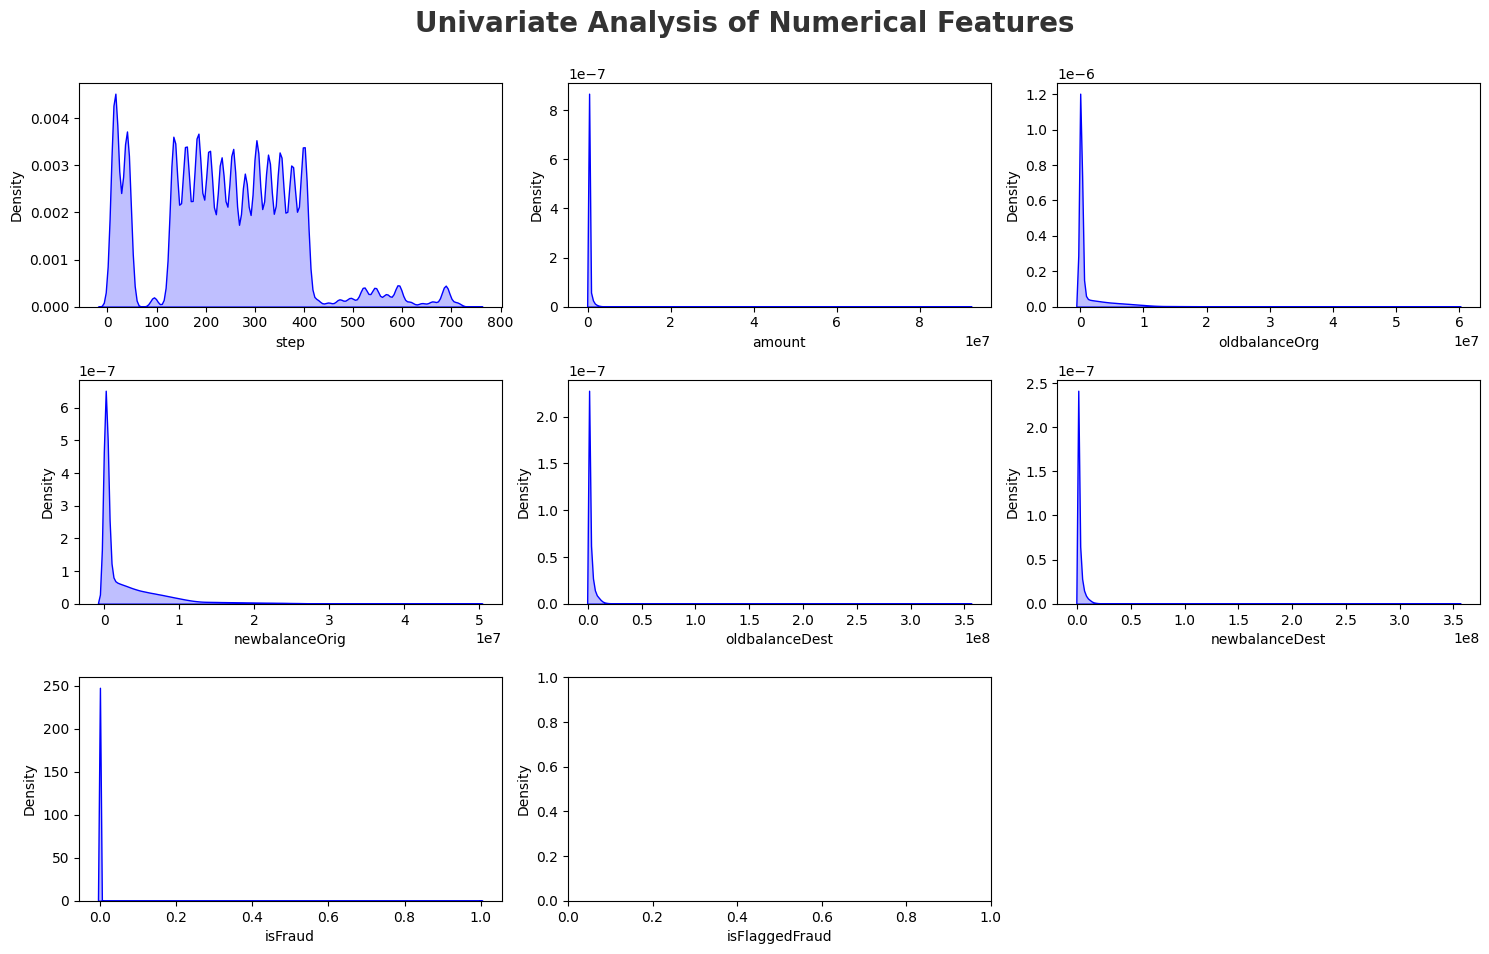

In [ ]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

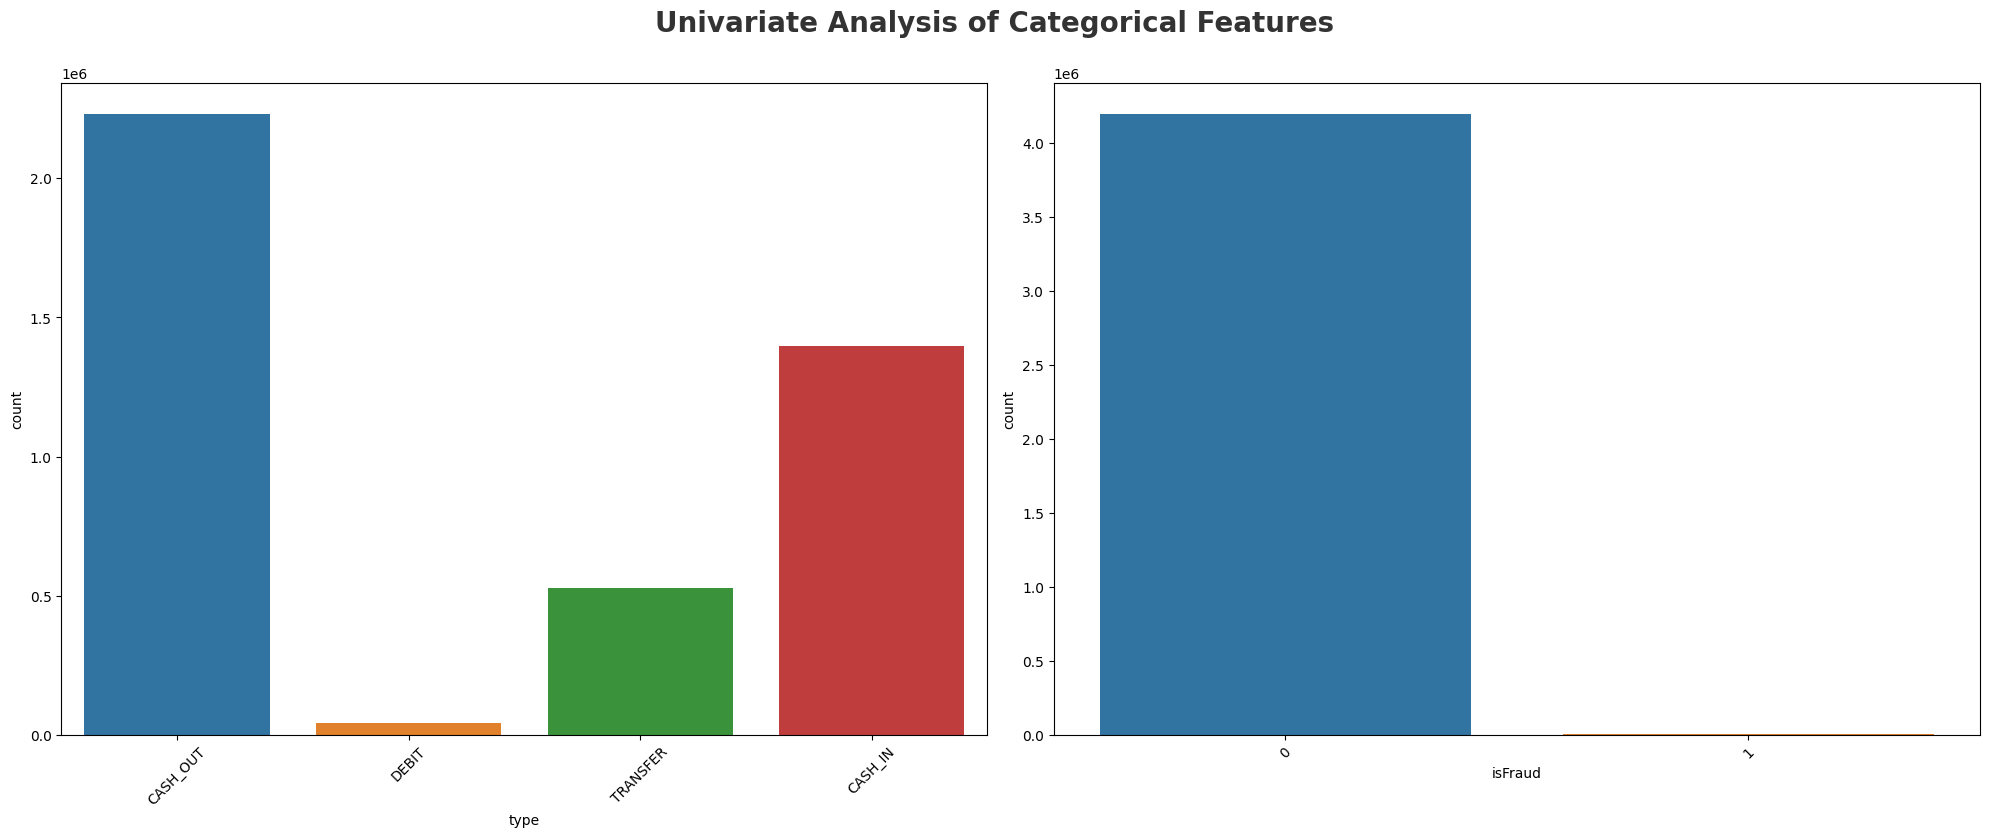

In [ ]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = ['type', 'isFraud']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

<Axes: >

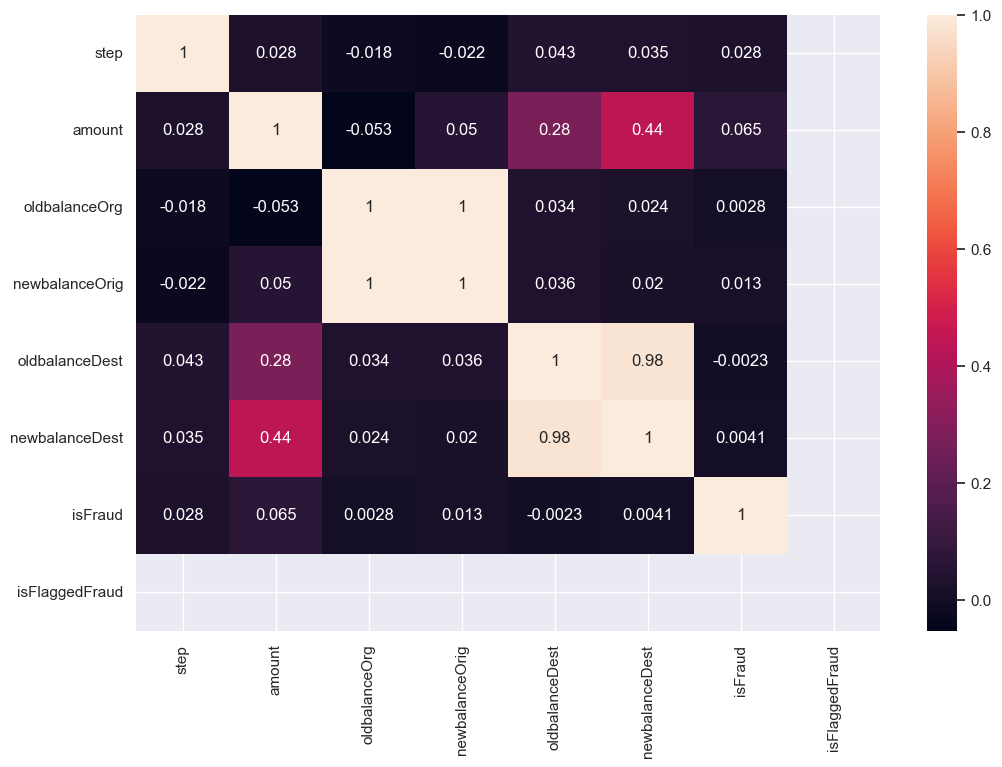

In [ ]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
sns.set(rc= {"figure.figsize":(12,8)})
sns.heatmap(df[numeric_features].corr(),annot= True)

**DROPPING MULTICOLLINEAR COLUMNS**

In [ ]:
df = df.drop(["oldbalanceDest", "newbalanceOrig"], axis=1)

**REMOVING OUTLIERS**

In [ ]:
z_score1 = stats.zscore(df["amount"])

In [ ]:
df = df[np.abs(z_score1) < 3]

**LABEL ENCODING**

In [ ]:
df = df.replace(np.nan, 0)

In [ ]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
for i in df.columns:
        if i in categorical_features:
            df[i] = le.fit_transform(df[i])

In [ ]:
df = df.astype(int)

**SPLITTING THE DATASET**

In [ ]:
X = df.drop(["isFraud", "isFlaggedFraud"], axis=1)
y = df["isFraud"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**TRAINING THE MODEL**

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

In [ ]:
filename= "model.pkl"
with open(filename,"wb") as  file:
    pickle.dump(rfc, file)

In [ ]:
filename= "model.pkl"
with open(filename,"rb") as  file:
    loaded_model = pickle.load(file)

In [ ]:
importance_scores = loaded_model.feature_importances_
feature_names = X_train.columns
import matplotlib.pyplot as plt

sorted_idx = importance_scores.argsort()[::-1]
plt.bar(feature_names[sorted_idx], importance_scores[sorted_idx])
plt.xticks(rotation=90)
plt.show()

In [ ]:
pred = loaded_model.predict(X_test)

print("Accuracy: ", accuracy_score(pred, y_test),
     "Precision: ", precision_score(pred, y_test),
     "Recall: ", recall_score(pred, y_test),
     "F1-score: ", f1_score(pred, y_test))

Accuracy:  0.9994898059300249 Precision:  0.3920353982300885 Recall:  0.9672489082969432 F1-score:  0.5579345088161209


In [ ]:
# Calculating fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, pred)

# Calculate AUC score
auc_score = roc_auc_score( y_test, pred)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

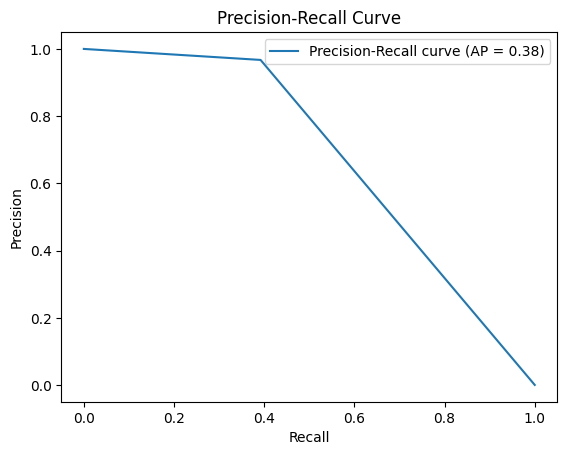

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, pred)

# Calculate average precision score
avg_precision = average_precision_score(y_test, pred)

# Plot precision-recall curve
plt.plot(recall, precision, label='Precision-Recall curve (AP = %0.2f)' % avg_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

**UNDERSAMPLING THE IMBALANCED DATASET**

In [ ]:
train_data = pd.concat([X_train, y_train], axis=1)
# Separating the minority and majority classes
fraud_data = train_data[train_data['isFraud'] == 1]
non_fraud_data = train_data[train_data['isFraud'] == 0]

# Downsampling the majority class
n_samples = len(fraud_data) * 2
downsampled_data = resample(non_fraud_data, replace=False, n_samples=n_samples, random_state=42)

# Combining the minority and majority classes
balanced_data = pd.concat([fraud_data, downsampled_data])

# Split the balanced dataset into training and validation sets
X_train_balanced, X_val_balanced, y_train_balanced, y_val_balanced = train_test_split(balanced_data.drop(['isFraud'], axis=1), balanced_data['isFraud'], test_size=0.3, random_state=42)


**TRAINING AND EVALUATING THE MODEL**

In [ ]:
# Train and evaluate the model on the balanced dataset
model.fit(X_train_balanced, y_train_balanced)
y_pred = model.predict(X_val_balanced)
accuracy = accuracy_score(y_val_balanced, y_pred)
precision = precision_score(y_val_balanced, y_pred)
recall = recall_score(y_val_balanced, y_pred)
f1score = f1_score(y_val_balanced, y_pred)

In [ ]:
print(accuracy,precision,recall,f1score)

In [ ]:
confusion_matrix(y_val_balanced, y_pred)


In [ ]:
data = {"Accuracy" : [accuracy_score(pred, y_test),accuracy],
     "Precision ": [precision_score(pred, y_test),precision],
     "Recall ": [recall_score(pred, y_test),recall],
     "F1-score ": [f1_score(pred, y_test),f1score]}
data = pd.DataFrame(data)
data.to_csv("reports.csv")